In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.animation as animation
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression 

In [59]:
# gradient descent and least square regression

x, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, noise = 20, random_state = 2018)
x = x.flatten()

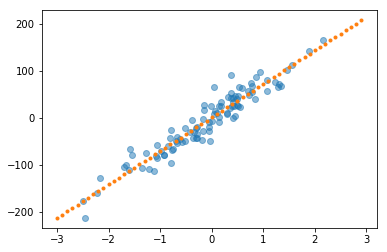

In [60]:
slope, intercept, _, _, _ = stats.linregress(x, y)

plt.plot(x, y, 'o', alpha = 0.5)
# np.vectorize maps array to function using numpy broadcasting rules
best_fit = np.vectorize(lambda x: x* slope + intercept)

grid = np.arange(-3, 3, 0.1)
plt.plot(grid, best_fit(grid), '.')

### batch gradient descent 

θj = θj + α * ∑i (y(i) − fθ(x(i))) * x(i)j

for the jth component of the parameter vector 

In [73]:
def gradient_descent(x, y, theta_init, step = 0.001, maxsteps = 0, precision = 0.001):
    
    costs = []
    # number of data points 
    m = y.size 
    theta = theta_init
    # to store all thetas
    history = [] 
    preds = []
    counter = 0
    oldcost = 0
    
    pred = np.dot(x, theta)
    error = pred - y
    currentcost = np.sum(error ** 2)/ (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter += 1
    
    while abs(currentcost - oldcost) > precision:
        oldcost = currentcost
        # two columns in x for intercept and slope 
        gradient = np.dot(x.T, error)/m
        # update parameters
        theta = theta - step * gradient
        history.append(theta)
        
        # prediction for all the xs in the 2d array
        pred = np.dot(x, theta)
        error = pred - y
        currentcost = np.sum(error ** 2)/ (2 * m )
        costs.append(currentcost)
        
        # keep track of counter and estimation in multiples of 25
        if counter % 25 == 0: 
            preds.append(pred)
            counter += 1
        if maxsteps:
            if counter == maxsteps:
                break
                
    return history, costs, preds, counter 

In [74]:
# bias term 
xaug = np.c_[np.ones(x.shape[0]), x]
# initialize the parameters 
theta_i = [-15, 40] + np.random.rand(2)

history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step = 0.1)
theta = history[-1]

In [75]:
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: 0.95, 71.34 1
Least Squares: 1.00, 71.43


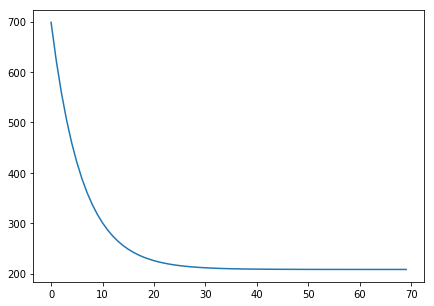

In [80]:
plt.figure(figsize = (7, 5))
plt.plot(range(len(cost)), cost)

In [81]:
from JSAnimation import IPython_display

def init():
    line.set_data([], [])
    return line,

def animate(i):
    ys = preds[i]
    line.set_data(xaug[:, 1], ys)
    return line,

fig = plt.figure(figsize = (10,6))
ax = plt.axes(xlim = (-3, 2.5), ylim = (-170, 170))
ax.plot(xaug[:,1], y, 'o')
line, = ax.plot([], [], lw = 2)
plt.plot(xaug[:,1], best_fit(xaug[:,1]), 'k-', color = "r")

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(preds), interval=100)
anim.save('images/gdline.mp4')
anim

ImportError: No module named 'JSAnimation'

In [96]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((np.dot(X, THETA) - Y) ** 2)/ (2 * Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)


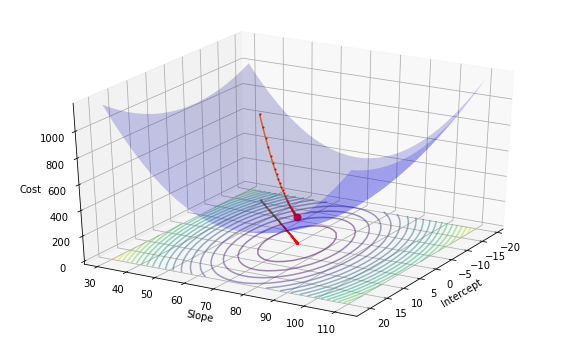

In [139]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride = 1, cstride = 1, color = 'b', alpha = 0.2)
ax.contour(M, B, Z, 20, color = 'b', alpha = 0.5, offset = 0, stride = 30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev = 30, azim = 30)
ax.plot([theta[0]], [theta[1]], [cost[-1]], markerfacecolor = 'r', markeredgecolor = 'r', marker = 'o', markersize = 7);
#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);

ax.plot([t[0] for t in history], [t[1] for t in history], cost, markerfacecolor = 'r', markeredgecolor = 'r', marker='.', markersize = 2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0, markerfacecolor = 'r', markeredgecolor = 'r', marker='.', markersize = 2);


### stochastic gradient descent 

the gradient descent algorithm makes intuitive sense as it always proceeds in the direction of steepest descent (the gradient of J) and guarantees that we find a local minimum (global under certain assumptions on J).

Generally, the stochastic gradient descent method will get close to the optimal θ much faster than the batch method, but will never fully converge to the local (or global) minimum. Thus the stochastic gradient descent method is useful when we want a quick and dirty approximation for the solution to our optimization problem. 

The reshuffling of the data is done to avoid a bias in the optimization algorithm by providing the data examples in a particular order. 

https://am207.github.io/2017/wiki/gradientdescent.html#stochastic-gradient-descent

    for i in range(nb_epochs):

       np.random.shuffle(data)
  
       for example in data:
  
            params_grad = evaluate_gradient(loss_function, example, params)
    
            params = params - learning_rate * params_grad

In [144]:
np.ravel(yv)

array([ 0.,  0.,  0.,  1.,  1.,  1.])

In [146]:
yv

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

In [147]:
y

array([ 0.,  1.])

In [148]:
x

array([ 0. ,  0.5,  1. ])

In [149]:
xv

array([[ 0. ,  0.5,  1. ],
       [ 0. ,  0.5,  1. ]])